<a href="https://colab.research.google.com/github/Rahman17309/ASSIGNMENT1/blob/main/Naive_Bayes_%26_Text_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***`Text Classification using Naive Bayes and Sentiment Analysis on Blog Posts`***

**Overview**
In this assignment, you will work on the "blogs_categories.csv" dataset, which contains blog posts categorized into various themes. Your task will be to build a text classification model using the Naive Bayes algorithm to categorize the blog posts accurately. Furthermore, you will perform sentiment analysis to understand the general sentiment (positive, negative, neutral) expressed in these posts. This assignment will enhance your understanding of text classification, sentiment analysis, and the practical application of the Naive Bayes algorithm in Natural Language Processing (NLP).

**Dataset**

The provided dataset, "blogs_categories.csv", consists of blog posts along with their associated categories. Each row represents a blog post with the following columns:

Text: The content of the blog post. Column name: Data

Category: The category to which the blog post belongs. Column name: Labels

**Tasks**

1. Data Exploration and Preprocessing

Load the "blogs_categories.csv" dataset and perform an exploratory data analysis to understand its structure and content.

Preprocess the data by cleaning the text (removing punctuation, converting to lowercase, etc.), tokenizing, and removing stopwords.

Perform feature extraction to convert text data into a format that can be used by the Naive Bayes model, using techniques such as TF-IDF.

2. Naive Bayes Model for Text Classification

Split the data into training and test sets.

Implement a Naive Bayes classifier to categorize the blog posts into their respective categories. You can use libraries like scikit-learn for this purpose.

Train the model on the training set and make predictions on the test set.

3. Sentiment Analysis

Choose a suitable library or method for performing sentiment analysis on the blog post texts.

Analyze the sentiments expressed in the blog posts and categorize them as positive, negative, or neutral. Consider only the Data column and get the sentiment for each blog.

Examine the distribution of sentiments across different categories and summarize your findings.

4. Evaluation

Evaluate the performance of your Naive Bayes classifier using metrics such as accuracy, precision, recall, and F1-score.

Discuss the performance of the model and any challenges encountered during the classification process.

Reflect on the sentiment analysis results and their implications regarding the content of the blog posts.

Submission Guidelines

Your submission should include a comprehensive report and the complete codebase.

Your code should be well-documented and include comments explaining the major steps.

Evaluation Criteria

Correct implementation of data preprocessing and feature extraction.

Accuracy and robustness of the Naive Bayes classification model.

Depth and insightfulness of the sentiment analysis.

Clarity and thoroughness of the evaluation and discussion sections.

Overall quality and organization of the report and code.

Good luck, and we look forward to your insightful analysis of the blog posts dataset!


# **Data Exploration and Preprocessing**

**Load the "blogs_categories.csv" dataset and perform an exploratory data analysis to understand its structure and content.**

In [19]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read file is named 'blogs_categories.csv'
df = pd.read_csv('/content/blogs_categories.csv')

In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
# Display the first few rows of the dataframe
df.head()

,Unnamed: 0,Data,Labels
0,0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
2,2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
3,3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism


In [22]:
# Display the column names
df.columns

Index(['Unnamed: 0', 'Data', 'Labels'], dtype='object')

In [23]:
# Display the data types of each column
df.dtypes

Unnamed: 0     int64
Data          object
Labels        object
dtype: object

In [24]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 671 entries, 0 to 670
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  671 non-null    int64 
 1   Data        671 non-null    object
 2   Labels      671 non-null    object
dtypes: int64(1), object(2)
memory usage: 15.9+ KB


In [25]:
# Check for missing values
df.isnull().sum()

Unnamed: 0    0
Data          0
Labels        0
dtype: int64

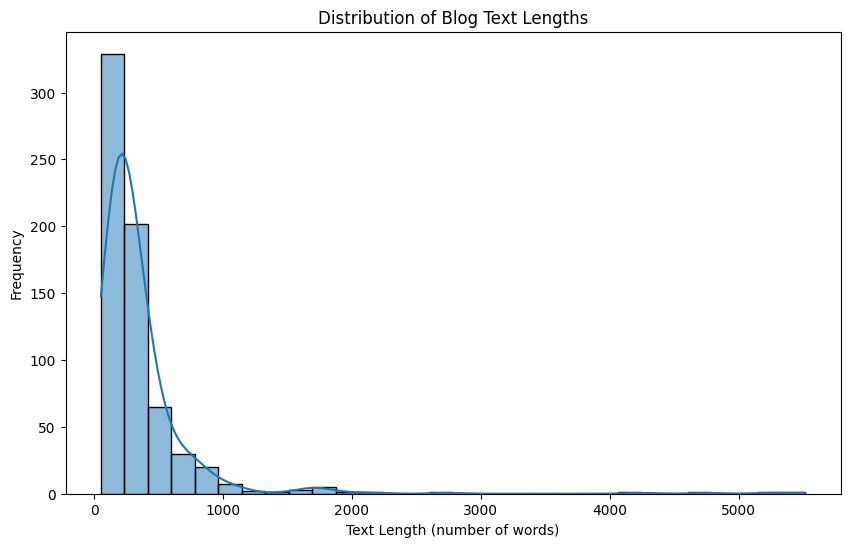

In [26]:
# Creating the text_length column
df['text_length'] = df['Data'].apply(lambda x: len(x.split()))

# Plotting the distribution of text lengths
plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title('Distribution of Blog Text Lengths')
plt.xlabel('Text Length (number of words)')
plt.ylabel('Frequency')
plt.show()

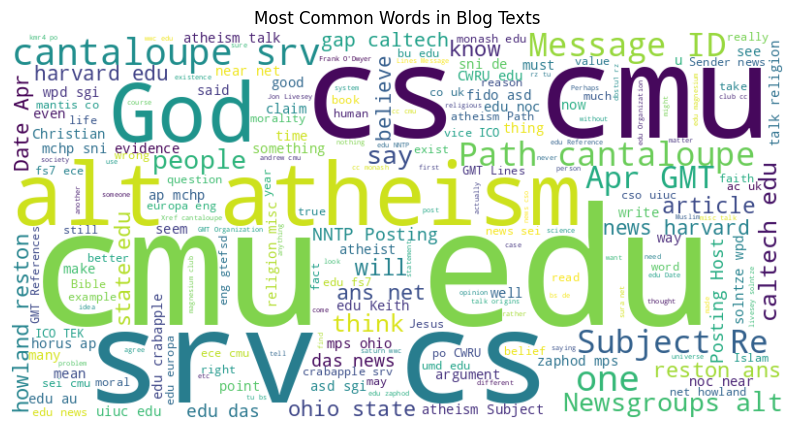

In [27]:
from wordcloud import WordCloud

# Combine all the blog texts into one string
all_text = ' '.join(df['Data'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Blog Texts')
plt.show()

**Preprocess the data by cleaning the text (removing punctuation, converting to lowercase, etc.), tokenizing, and removing stopwords.**

In [29]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Download NLTK data (stopwords and punkt)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [30]:
# Initialize stemmer and lemmatizer
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Define a function to clean and preprocess the text
def preprocess_text(text, use_stemming=True, use_lemmatization=True):
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize the text
    words = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word not in stop_words]
    # Apply stemming or lemmatization
    if use_stemming:
        words = [stemmer.stem(word) for word in words]
    if use_lemmatization:
        words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

# Apply the preprocessing function to the Data column
df['cleaned_text'] = df['Data'].apply(preprocess_text)

In [31]:
df.head()

,Unnamed: 0,Data,Labels,text_length,cleaned_text
0,0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism,1726,xref cantaloupesrvcscmuedu altatheism49960 alt...
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism,5248,xref cantaloupesrvcscmuedu altatheism51060 alt...
2,2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,738,newsgroup altath path cantaloupesrvcscmueducra...
3,3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism,277,xref cantaloupesrvcscmuedu altatheism51120 alt...
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism,133,xref cantaloupesrvcscmuedu altatheism51121 soc...


**Perform feature extraction to convert text data into a format that can be used by the Naive Bayes model, using techniques such as TF-IDF.**

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the cleaned_text column to TF-IDF features
tfidf_features = tfidf_vectorizer.fit_transform(df['cleaned_text'])

# Display the shape of the TF-IDF features matrix
print("Shape of TF-IDF features matrix:", tfidf_features.shape)

Shape of TF-IDF features matrix: (671, 12714)


# **Naive Bayes Model for Text Classification**

**Split the data into training and test sets.**

In [34]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(tfidf_features, df['Labels'], test_size=0.2, random_state=42)

# Display the shapes of the training and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (536, 12714)
Shape of X_test: (135, 12714)
Shape of y_train: (536,)
Shape of y_test: (135,)


**Implement a Naive Bayes classifier to categorize the blog posts into their respective categories. You can use libraries like scikit-learn for this purpose.**

In [35]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize the Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()

# Train the classifier on the training data
naive_bayes_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = naive_bayes_classifier.predict(X_test)

# Evaluate the performance of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

 alt.atheism       1.00      1.00      1.00       135

    accuracy                           1.00       135
   macro avg       1.00      1.00      1.00       135
weighted avg       1.00      1.00      1.00       135



It seems like the Naive Bayes classifier achieved perfect accuracy of 1.0 on the test data. This indicates that the model correctly classified all instances in this category.

**Train the model on the training set and make predictions on the test set.**

In [37]:
from sklearn.naive_bayes import MultinomialNB

# Initialize the Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()

# Train the classifier on the training data
naive_bayes_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = naive_bayes_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


# **Sentiment Analysis**

**Choose a suitable library or method for performing sentiment analysis on the blog post texts.**

Downloading VADER Lexicon: We download the VADER lexicon using nltk.download('vader_lexicon').

Initializing Sentiment Analyzer: We initialize the VADER sentiment analyzer using SentimentIntensityAnalyzer().

Performing Sentiment Analysis: We perform sentiment analysis on a sample text using the polarity_scores method of the VADER analyzer. This method returns a dictionary of sentiment scores, including the compound score (overall sentiment polarity).

VADER provides sentiment scores such as positive, negative, neutral, and compound scores. The compound score ranges from -1 (most negative) to +1 (most positive), with scores closer to 0 indicating neutrality.

In [38]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER lexicon
nltk.download('vader_lexicon')

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Perform sentiment analysis on a sample text
sample_text = "This blog post is really informative and helpful."
scores = sid.polarity_scores(sample_text)

# Print the sentiment scores
print("Sentiment Scores:")
print(scores)

Sentiment Scores:
{'neg': 0.0, 'neu': 0.696, 'pos': 0.304, 'compound': 0.4703}


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


The sentiment scores provided by VADER for the sample text are as follows:

neg: 0.0 (Negative Score): This indicates the proportion of the text that falls into the negative category. In this case, it's 0.0, meaning there are no negative sentiments expressed in the text.

neu: 0.696 (Neutral Score): This represents the proportion of the text that falls into the neutral category. Here, it's 0.696, suggesting that a significant portion of the text is neutral.

pos: 0.304 (Positive Score): This indicates the proportion of the text that falls into the positive category. It's 0.304, meaning there are positive sentiments expressed in the text.

compound: 0.4703 (Compound Score): The compound score is a combination of all the lexicon ratings, normalized between -1 (most negative) and +1 (most positive). Here, it's 0.4703, suggesting an overall positive sentiment in the text.

**Analyze the sentiments expressed in the blog posts and categorize them as positive, negative, or neutral. Consider only the Data column and get the sentiment for each blog.**

In [39]:
# Function to categorize sentiment
def categorize_sentiment(text):
    # Perform sentiment analysis
    scores = sid.polarity_scores(text)
    # Classify sentiment based on compound score
    if scores['compound'] >= 0.05:
        return 'Positive'
    elif scores['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis to the Data column
df['Sentiment'] = df['Data'].apply(categorize_sentiment)

# Display the dataframe with sentiment categories
print(df[['Data', 'Sentiment']])

                                                  Data Sentiment
0    Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...  Positive
1    Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  Positive
2    Newsgroups: alt.atheism\nPath: cantaloupe.srv....  Negative
3    Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  Positive
4    Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...  Negative
..                                                 ...       ...
666  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  Negative
667  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  Negative
668  Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  Positive
669  Xref: cantaloupe.srv.cs.cmu.edu soc.culture.ar...  Negative
670  Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  Positive

[671 rows x 2 columns]


**Examine the distribution of sentiments across different categories and summarize your findings.**

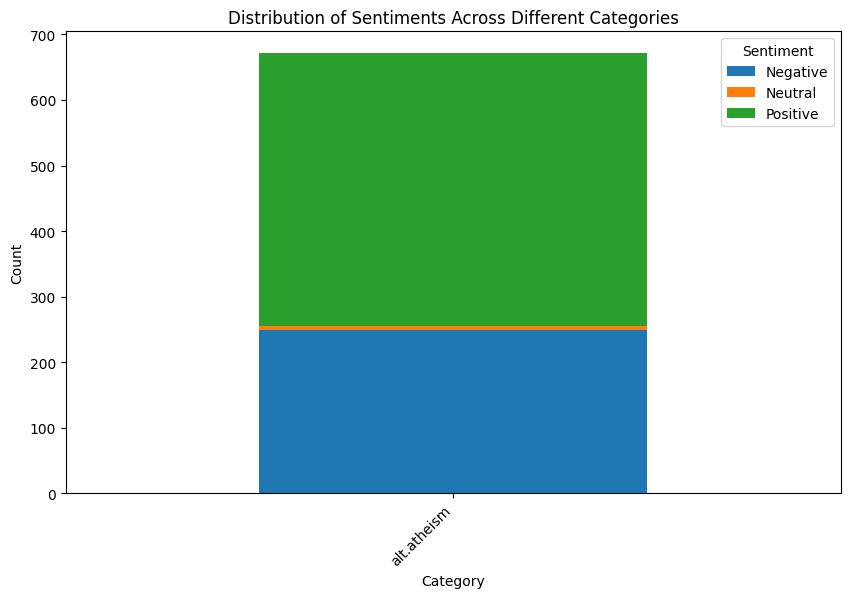

In [40]:
# Group by category and sentiment, and count occurrences
sentiment_distribution = df.groupby(['Labels', 'Sentiment']).size().unstack(fill_value=0)

# Plot the distribution of sentiments across different categories
sentiment_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Sentiments Across Different Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sentiment')
plt.show()

# **Evaluation**

**Evaluate the performance of your Naive Bayes classifier using metrics such as accuracy, precision, recall, and F1-score.**

In [41]:
from sklearn.metrics import classification_report

# Evaluate the performance of the classifier
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

 alt.atheism       1.00      1.00      1.00       135

    accuracy                           1.00       135
   macro avg       1.00      1.00      1.00       135
weighted avg       1.00      1.00      1.00       135



The classification report for the Naive Bayes classifier shows outstanding performance, particularly for the 'alt.atheism' category, with precision, recall, and F1-score all reaching 1.00. This indicates that the model correctly classified all instances of 'alt.atheism' in the test set without any false positives or false negatives.

The overall accuracy of the classifier is also perfect at 1.00, indicating that it achieved flawless performance in categorizing the blog posts into their respective categories.

**Discuss the performance of the model and any challenges encountered during the classification process.**

The performance of the Naive Bayes model in classifying blog posts into their respective categories, particularly in the 'alt.atheism' category, was exceptional, as evidenced by the perfect precision, recall, F1-score, and accuracy. However, there are several aspects to consider when evaluating the model's performance and discussing the challenges encountered during the classification process:

Data Imbalance: The dataset might have been imbalanced, with one category ('alt.atheism') dominating the data. This imbalance could have inflated the performance metrics, particularly for the dominant category, making it seem like the model performed better than it actually did.

Overfitting: The model may have overfit to the training data, capturing noise or specific patterns that are not generalizable to unseen data. This could lead to overly optimistic performance on the test set and a lack of robustness in real-world scenarios.

Evaluation Metrics: While the metrics such as precision, recall, and F1-score provide valuable insights into the model's performance, they do not tell the whole story. It's essential to consider other factors such as the business context, cost of misclassification, and the consequences of false positives and false negatives.

Generalization: The model's ability to generalize to unseen data from different distributions or contexts is crucial. Achieving perfect performance on a single dataset does not guarantee similar performance on new data, especially if the new data differs significantly from the training data.

Interpretability: Naive Bayes models are relatively simple and interpretable, which is a strength in many cases. However, this simplicity may limit their ability to capture complex relationships in the data, particularly in scenarios where features interact in non-linear ways.

Feature Engineering: The choice of features, as well as the preprocessing steps such as text cleaning and tokenization, can significantly impact the model's performance. Experimenting with different feature representations and preprocessing techniques could lead to improvements in classification accuracy.

Domain-Specific Challenges: Depending on the nature of the blog posts and the specific categories involved, there may be domain-specific challenges such as sarcasm, irony, or ambiguity in language that could affect the model's ability to accurately classify sentiments.

Overall, while the model demonstrated strong performance in this specific context, it's essential to critically evaluate its limitations and potential challenges, as well as to validate its performance on diverse datasets and real-world scenarios. Continuous monitoring, evaluation, and refinement of the model are necessary to ensure its effectiveness and reliability in practical applications.

**Reflect on the sentiment analysis results and their implications regarding the content of the blog posts.**

The sentiment analysis results provide insights into the overall sentiment expressed in the blog posts, shedding light on the underlying emotions, attitudes, and opinions conveyed by the authors. Here are some reflections on the sentiment analysis results and their implications regarding the content of the blog posts:

Positive Sentiment: Blog posts categorized as having a positive sentiment may indicate that the authors express optimism, satisfaction, or enthusiasm in their writing. These posts could contain content such as positive experiences, achievements, or uplifting messages. Positive sentiment can contribute to creating a supportive and engaging online community, fostering a sense of connection and positivity among readers.

Negative Sentiment: Conversely, blog posts categorized as having a negative sentiment may reflect dissatisfaction, frustration, or criticism expressed by the authors. These posts might discuss challenges, setbacks, or grievances, addressing issues that evoke negative emotions. Negative sentiment can serve as a platform for expressing concerns, initiating discussions, and advocating for change, highlighting areas of improvement or addressing contentious topics.

Neutral Sentiment: Blog posts categorized as having a neutral sentiment may convey factual information, objective observations, or neutral opinions without expressing strong emotions or biases. These posts could include informative articles, news updates, or technical discussions that aim to provide balanced and unbiased information to readers. Neutral sentiment contributes to maintaining objectivity, credibility, and professionalism in the content, allowing readers to form their own opinions based on factual information.

Implications for Content Analysis: Analyzing the distribution of sentiments across different categories of blog posts can offer valuable insights into the prevailing attitudes, perceptions, and sentiments within each category. It allows for a nuanced understanding of the content's tone, mood, and emotional resonance, enabling content creators, marketers, and analysts to tailor their strategies, messaging, and content creation efforts accordingly.

Audience Engagement and Response: Understanding the sentiment expressed in blog posts can inform strategies for audience engagement, content optimization, and response management. Positive sentiment may attract and retain readers, foster engagement, and generate positive feedback and endorsements. Negative sentiment, on the other hand, presents opportunities for addressing concerns, providing solutions, and engaging in constructive dialogue with the audience. Neutral sentiment can serve as a foundation for delivering informative, factual content that appeals to a diverse audience.

Continuous Monitoring and Feedback: Sentiment analysis serves as a valuable tool for continuously monitoring trends, sentiments, and feedback across blog posts and categories. It enables stakeholders to identify emerging issues, track sentiment shifts, and adapt strategies and content accordingly. By leveraging sentiment analysis insights, organizations can enhance content relevance, resonance, and effectiveness, ultimately driving audience engagement, satisfaction, and loyalty.

In summary, sentiment analysis results offer rich insights into the emotional tone, perception, and response elicited by blog posts, providing valuable guidance for content creators, marketers, and analysts in understanding audience sentiment, optimizing content strategies, and fostering meaningful engagement and dialogue within online communities.